## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [7]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

import warnings

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv(r"C:\PROJECTS\GENDER-PREDICTION\notebook\data\gender.csv")

#### Show Top 5 Records

In [5]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


#### Preparing X and Y variables

In [8]:
X = df.drop(columns=['gender'],axis=1)

In [9]:
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [10]:
y = df['gender']

In [11]:
y

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4996    Female
4997    Female
4998    Female
4999    Female
5000      Male
Name: gender, Length: 5001, dtype: object

In [13]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
lb_transformer = LabelEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", lb_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [14]:
X = preprocessor.fit_transform(X)

In [15]:
X.shape

(5001, 7)

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((4000, 7), (1001, 7))

#### Create an Evaluate Function to give all metrics after model Training

In [17]:
def evaluate_model(true, predicted):
    acc_score=accuracy_score(true,predicted)
    return acc_score

In [19]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classification": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest ": RandomForestClassifier(),
    "Gaussian ": GaussianNB(),
    
    
}
model_list = []
score_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    train_score = accuracy_score(y_train, y_train_pred)

    test_score = accuracy_score(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy score: {:.4f}".format(train_score))
    

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy score: {:.4f}".format(test_score))

    score_list.append(test_score)
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy score: 0.9700
----------------------------------
Model performance for Test set
- Accuracy score: 0.9610


K-Neighbors Classification
Model performance for Training set
- Accuracy score: 0.9762
----------------------------------
Model performance for Test set
- Accuracy score: 0.9590


Decision Tree
Model performance for Training set
- Accuracy score: 0.9982
----------------------------------
Model performance for Test set
- Accuracy score: 0.9510


Random Forest 
Model performance for Training set
- Accuracy score: 0.9980
----------------------------------
Model performance for Test set
- Accuracy score: 0.9590


Gaussian 
Model performance for Training set
- Accuracy score: 0.9718
----------------------------------
Model performance for Test set
- Accuracy score: 0.9640




### Results

In [21]:
pd.DataFrame(list(zip(model_list, score_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Gaussian,0.964036
0,Logistic Regression,0.961039
1,K-Neighbors Classification,0.959041
3,Random Forest,0.959041
2,Decision Tree,0.951049


## GaussianNB

In [23]:
gc_model = GaussianNB()
gc_model = gc_model.fit(X_train, y_train)
y_pred = gc_model.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 96.40


## Plot y_pred and y_test

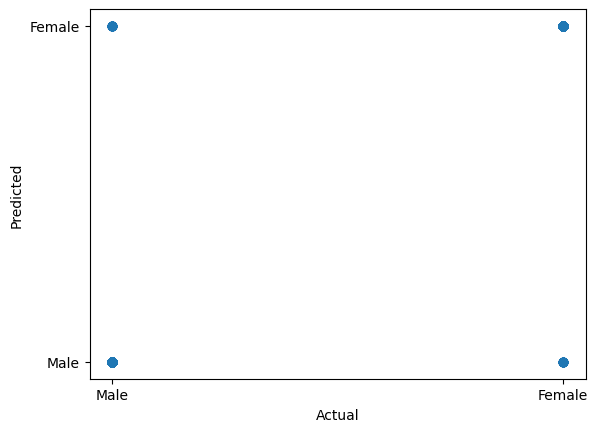

In [24]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');